# UNA COMPARACIÓN DE LAS REDES DE COMERCIO INTERNACIONAL DE     PETRÓLEO CRUDO DE LOS AÑOS 2012 Y 2016


## Introduccion 

En el año 2016 el precio promedio del barril de petróleo crudo, fijado por la Organización
de Países Exportadores de Petróleo (OPEP), fue de 26,5 dólares estadounidenses*,
siendo el más bajo de los últimos 15 años, esta caída “repentina” del precio del barril, que
para el año 2012 rondaba los 109.45 dólares estadounidense*, tuvo fuertes
repercusiones en las economías de países como Colombia, Venezuela y en general de
los países de la OPEP, organización que parece estar perdiendo influencia en el mercado
internacional de este producto. Para tener una visión más completa de lo que ha venido
ocurriendo en este mercado es necesario analizar las dinámicas del comercio
internacional de crudo, en este periodo de tiempo, como una red compleja o grafo, donde
los nodos o agentes sean los diferentes países que participan en este mercado y sus
conexiones (o arcos) los flujos comerciales entre ellos, ya sean importaciones o
exportaciones.
A raíz de la caída del precio del petróleo o, “posiblemente”, como su consecuencia, en el
periodo que va de los años 2012 a 2016 se pudieron haber dado algunos cambio
significativos en la estructura de las redes de comercio internacional del crudo, dichos
cambios, si ocurrieron realmente, podrían complementar la visión que se tiene sobre la
crisis de los precios del petróleo que se han venido dado desde el 2014 hasta hoy.


## Librerias necesarias

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Caraga y generacion de la base de datos a trabajar 2012

En las siguientes linias de comandos se cargan las bases de datos con las cuales se realizara la red, estas bases se unifican e un solo DataFrame. 

In [2]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

m=0
for j in range(118) :
    orig=pd.read_csv('2012_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('2012_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('2012_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('2012_' + str(j)+'.csv',index_col=0)
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/109.45e+9
        
    m=i+m+1

print(EDGES)
#print("....")
print(WEIGHT)


     country_origin_id country_destination_id
0                  ALB                    IND
1                  ALB                    DEU
2                  ALB                    ESP
3                  ALB                    ITA
4                  ALB                    MLT
5                  DZA                    EGY
6                  DZA                    CHN
7                  DZA                    IDN
8                  DZA                    IND
9                  DZA                    KOR
10                 DZA                    SGP
11                 DZA                    THA
12                 DZA                    TJK
13                 DZA                    AUT
14                 DZA                    BLX
15                 DZA                    CHE
16                 DZA                    CZE
17                 DZA                    DEU
18                 DZA                    DNK
19                 DZA                    ESP
20                 DZA            

## Visualizacion del grafo
### Grafo dirigido 

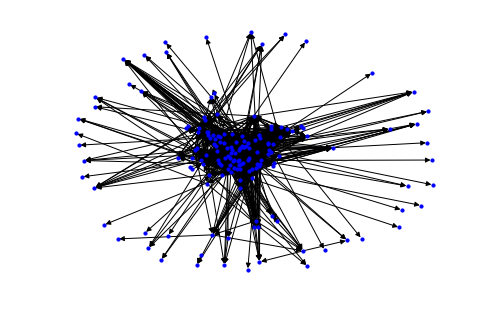

In [3]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 


G.add_edges_from(EDGES.values)

G.remove_node("XXB")
G.remove_node("XXF")
G.remove_node("XXA")
G.remove_node("XXC")
G.remove_node("XXD")
G.remove_node("XXG")


nx.draw(G,font_size=0.5,node_size=10,node_color='blue')

### Grafo dirigido y pesado 

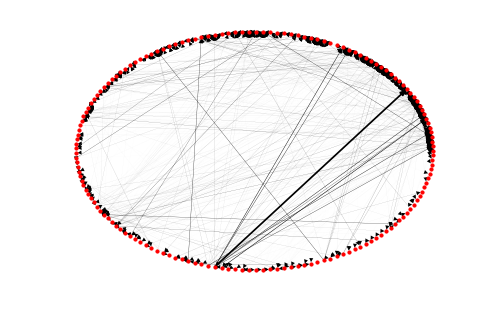

In [4]:
weight=WEIGHT.values #---> definimos los pesos para cada uno de los interaciones entre nodos


nx.draw_circular(G,width=weight,node_size=10,font_size=10,node_color='red') # Grafo circular
#node_size=node_sizes --> tamaño de los nodos

### Mejores visualizaciones del grafo, exportando como HTML con la libreria PyVis

In [5]:
from pyvis import network as net
g=net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
g.barnes_hut()
g.from_nx(G)
g.show("example.html")

## Medidas de Grafo
### Grado promedio
El grado promedio del grafo no dirigidos se puede calcular como: 
$$\bar{d}=\frac{\sum_{i=1}^g d(n_i)}{g}=\frac{2L}{g}$$

Donde $d(n_i)$ es el numero de vinvulos que tiene el nodo $i$, $g$ es el numero total de nodos de la red, y $L$ el numero tatal de aristas. 
para encontrar el numero de nodos podemos simplemente usar la funcion nx.number_of_nodes(G) que devuelve la cantidad total de nodos del grafo, y para encontrar el numero total  de aristas usamos el funcion nx.number_of_edges(G) de Networkx:

In [6]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 161
L= 1030


Definimos una funcion que nos permite calcular el valor del grado promedio de nuestra red, suponiendola no dirigida, como : 

In [7]:
nodos=G.nodes
def grado_promedio(G,nodos):
    d=nx.degree(G)
    g=nx.number_of_nodes(G)
    suma=0
    for i in nodos:
        suma=d[i]+suma 
    grado_promedio=suma/g
    return grado_promedio 

print(grado_promedio(G,nodos))

12.79503105590062


En esta funcion se implementa la sumatoria del numero de vinculos de cada uno de los nodos divido por el numero total de nodos. Este calculo tambien se puede hacer simplemente dividiendo el doble del numero total de aritas $L$ por el numero total de nodos $g$, para el caso del grafo no dirigido: 

In [8]:
grado_promedio=2*L/g
print(grado_promedio)

12.79503105590062


Ahora para el caso del grafo dirigido, que es del tipo que necesitamos, el vinculo existente entre dos nodos se cuenta solo una vez, con esto la expresion cambia como: 
 $$\bar{d}=\frac{L}{g} $$

In [9]:
grado_promedio=L/g
print(grado_promedio)

6.39751552795031


Este seria entonces el grado promedio de nuestra red dirigida, y quiere decir que en promedio cada pais exporta a 7 paises. pero esta informacion por ahora no parece dicir mucho.  

### Varianza de los nodos

La varianza de los nodos se calcula como:

$$s_D^2=\frac{\sum_{i=1}^g (d(n_i)- \bar{d})^2}{g} $$

esta medida que tambien se puede interpretar como la variabilidad nodal, muestra que tan diferente actuan los ajentes de la red en cuanto a sus relaciones. 

In [10]:
nodos=G.nodes
def varianza(G,nodos):
    g=nx.number_of_nodes(G)
    grado_promedio=L/g    
    d_out=G.out_degree
    suma=0
    for i in nodos:
        suma=(d_out[i]-grado_promedio)**2 +suma 
    s=suma/g
    return s 

print(varianza(G,nodos))

81.64322364106327


Este medida pude ser muy poco util en nuestro analisis, si se tiene una red libre de escala, como es el caso. 

### Densidad 

Una medida importante de un grafo es su densidad, que se define como el numero de vinculos totales sobre el numero de vinculos posibles. este ultimo se puede calcular como 

$$L_p=\frac{g(g-1)}{2} $$

Para grafos no dirigidos. Para el caso de grafos dirigidos se define como:

$$L_p=g(g-1) $$

Con esto entonces la densidad es: 

$$\rho=\frac{L}{L_p} $$

que para este grafo sera:


In [11]:
L_p=g*(g-1)
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 25760
Densidad = 0.03998447204968944



### Distribucion de grados

Realicemos un histograma para ver el numero de vinvulos mas frecuentes en la red, en otras palabras la distribucion de grado en el grafo, para esto implementamos el siguiente algoritmo.

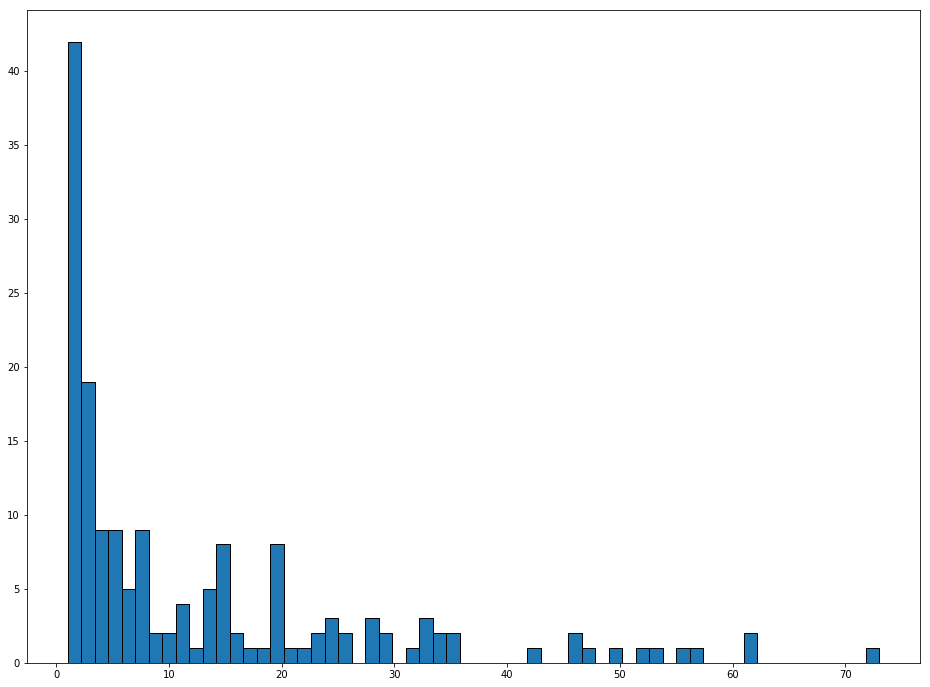

In [12]:
D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

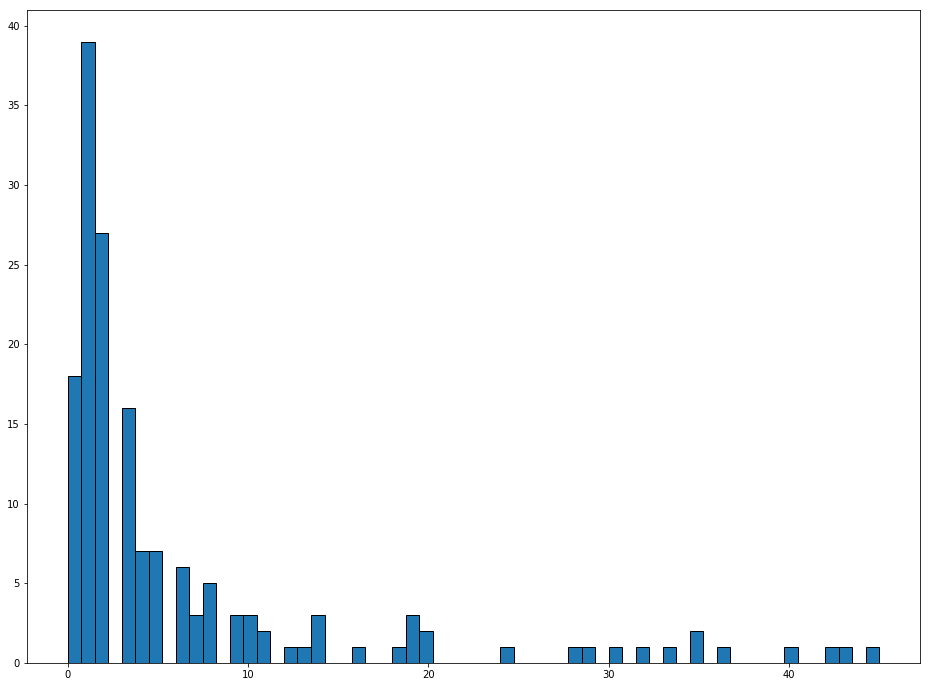

In [13]:
D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D_in, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

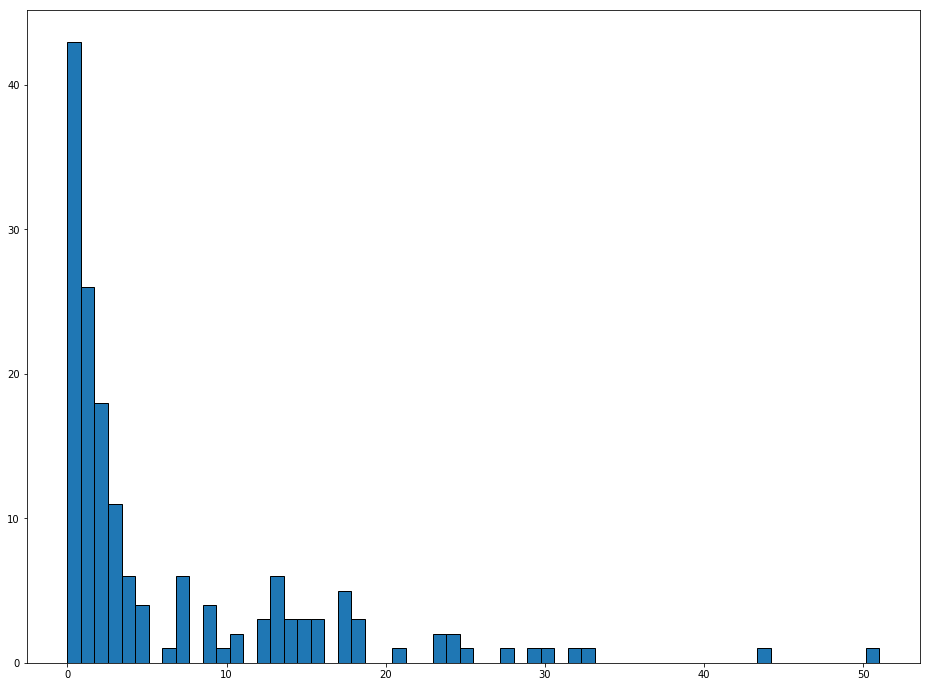

In [14]:
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D_out, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

Este histograma muestra que la mayoria de los nodos tiene pocas aristas, es decir que la gran mayoria de los paises tiene baja conectividad.¿seguira una ley de potencias?, el coportamiento parece ser el de una exponencial negativa, lo que nos dice que nuestro grafo es libre de escala, pero para afirmar esto primero tenemos que ver que efectivamente sigue una ley de potencias.

### Ley de potencias

Queremos ver cual es la probabilidad de encontrar un vertice con un numero de grado dado. para ello encontramos la probabilidad como: 
$$P(k_i)=\frac{\sum \text{vertices de grado igual a }k_i}{g} $$
Para esto implementamos el siguiente algoritmo, en el cual guardamos r la probabilidad de cada grado en el vector $P$ para el casa de la red no dirigida, o $P_{in}$ para el numero de grado de entrada y $P_{out}$ Para el grado de salida.

In [15]:

P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)        
        

        

Graficamos el vector de probabilidades de los grados vs el numero de grado. 

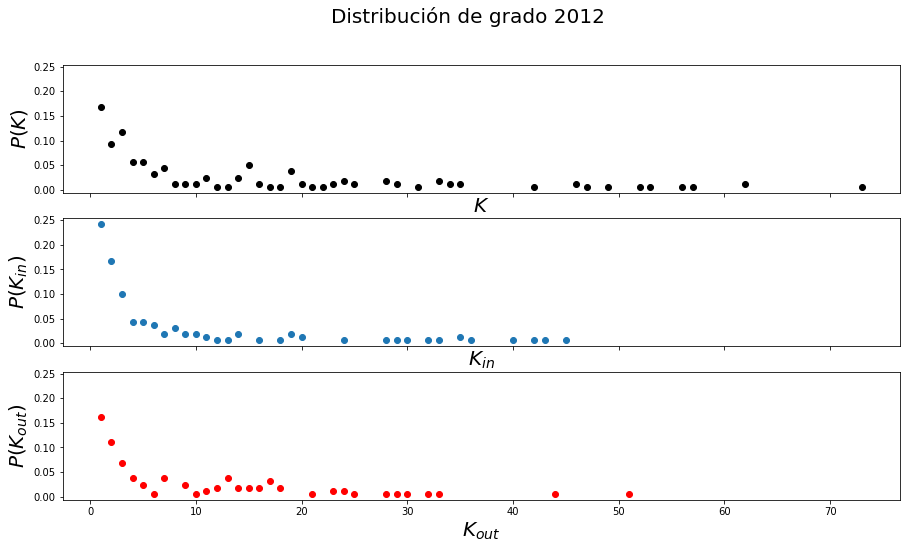

In [16]:
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

plt.savefig("Pr_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()        
        


En escala Log-Log, podemos observar el comportamiento tipico de una ley de potencias, la cual nos sugiere que el sistema de comercio internacional de petroleo crudo es un sistema que se autorganizando: 

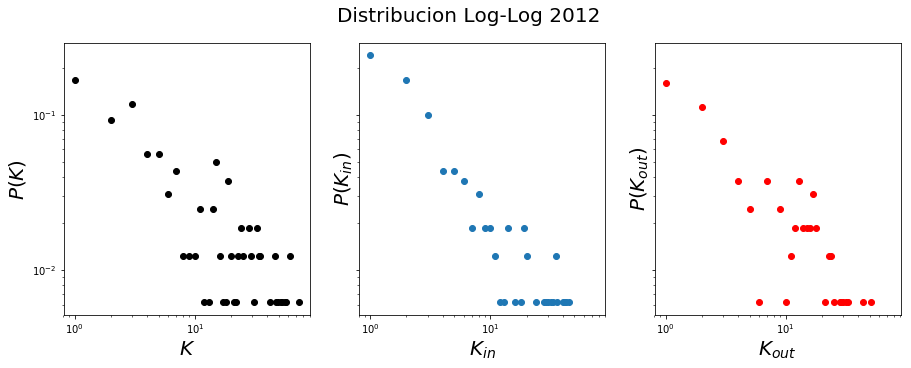

In [17]:
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()

### Medidas de Centralidades. 

#### Centralidad por Numero de vinculacion. 

Se ordena de mayor a menor los paises por el numero de vinculos internacionales en este mercado, en la siguiente lista por el numero de vinculos de importacion. 

In [18]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df=pd.DataFrame(d,columns=['Name', 'grado'])
print(df.sort_values(by='grado', ascending=False)) # Ordena el DataFrame por valores asendentes.
df.to_excel("df_2012.xlsx") # Imprime el DataFrame a un xlsx

    Name  grado
26   USA     73
20   GBR     62
8    CHN     62
22   NLD     57
19   FRA     56
2    DEU     53
122  RUS     52
1    IND     49
4    ITA     47
98   NGA     46
3    ESP     46
11   SGP     42
31   JPN     35
10   KOR     35
40   AUS     34
119  KAZ     34
9    IDN     33
12   THA     33
41   MYS     33
27   BRA     31
30   ZAF     29
148  SAU     29
49   AZE     28
95   ARE     28
6    DZA     28
24   CAN     25
115  IRQ     25
46   POL     24
82   COL     24
66   NOR     24
..   ...    ...
158  TCA      2
112  MUS      2
35   LCA      2
154  KHM      1
152  MDV      1
28   ASM      1
150  SHN      1
156  GUY      1
13   TJK      1
159  YEM      1
147  MKD      1
146  MDA      1
145  BEN      1
109  GIN      1
141  ATG      1
140  AND      1
139  BVT      1
136  GIB      1
108  HND      1
65   ISL      1
67   BLZ      1
130  LBR      1
127  DJI      1
75   CPV      1
79   PRK      1
120  KGZ      1
81   SLB      1
103  NCL      1
106  GUM      1
160  CRI      1

[161 ro

In [19]:
d_in=G.in_degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df_in=pd.DataFrame(d_in,columns=['Name', 'grado_in'])
print(df_in.sort_values(by='grado_in', ascending=False)) # Ordena el DataFrame por valores asendentes.
df_in.to_excel("df_in_2012.xlsx") # Imprime el DataFrame a un xlsx

    Name  grado_in
8    CHN        45
26   USA        43
1    IND        42
22   NLD        40
2    DEU        36
3    ESP        35
19   FRA        35
11   SGP        33
4    ITA        32
31   JPN        30
20   GBR        29
10   KOR        28
12   THA        24
41   MYS        20
9    IDN        20
46   POL        19
23   PRT        19
39   SDN        19
40   AUS        18
14   AUT        16
30   ZAF        14
24   CAN        14
27   BRA        14
55   GRC        13
43   NZL        12
21   IRL        11
15   BLX        11
71   PHL        10
16   CHE        10
32   SWE        10
..   ...       ...
68   BOL         1
70   BRN         1
121  UZB         1
79   PRK         1
81   SLB         1
160  CRI         1
91   DOM         1
120  KGZ         1
93   VEN         1
103  NCL         1
104  GEO         1
108  HND         1
151  SSD         0
28   ASM         0
157  TKM         0
114  IRN         0
155  TLS         0
109  GIN         0
153  SYR         0
49   AZE         0
106  GUM    

En la siguiente lista se encuentran los paises ordenados por numero de vinculos de exportacion. 

In [20]:
d_out=G.out_degree(G)
df_out=pd.DataFrame(d_out, columns=['Name', 'grado_out'])
print(df_out.sort_values(by='grado_out', ascending=False))
df_out.to_excel("df_out_2012.xlsx") # Imprime el DataFrame a un xlsx

    Name  grado_out
122  RUS         51
98   NGA         44
20   GBR         33
119  KAZ         32
26   USA         30
148  SAU         29
49   AZE         28
6    DZA         25
82   COL         24
95   ARE         24
131  LBY         23
115  IRQ         23
19   FRA         21
93   VEN         18
114  IRN         18
29   AGO         18
22   NLD         17
96   GNQ         17
27   BRA         17
2    DEU         17
8    CHN         17
66   NOR         16
73   COG         16
40   AUS         16
30   ZAF         15
4    ITA         15
7    EGY         15
50   TUN         14
125  KWT         14
143  QAT         14
..   ...        ...
23   PRT          0
154  KHM          0
156  GUY          0
13   TJK          0
159  YEM          0
139  BVT          0
133  JAM          0
137  TON          0
65   ISL          0
108  HND          0
85   SLV          0
112  MUS          0
81   SLB          0
79   PRK          0
78   MOZ          0
77   ETH          0
69   PRY          0
120  KGZ          0


Para tener una visualizacion de que paises tienen un numero significativo de vinculos, hacemos el tamaño de nodos variables respecto al numero de vertices de salida y de entrada respectivamente. 

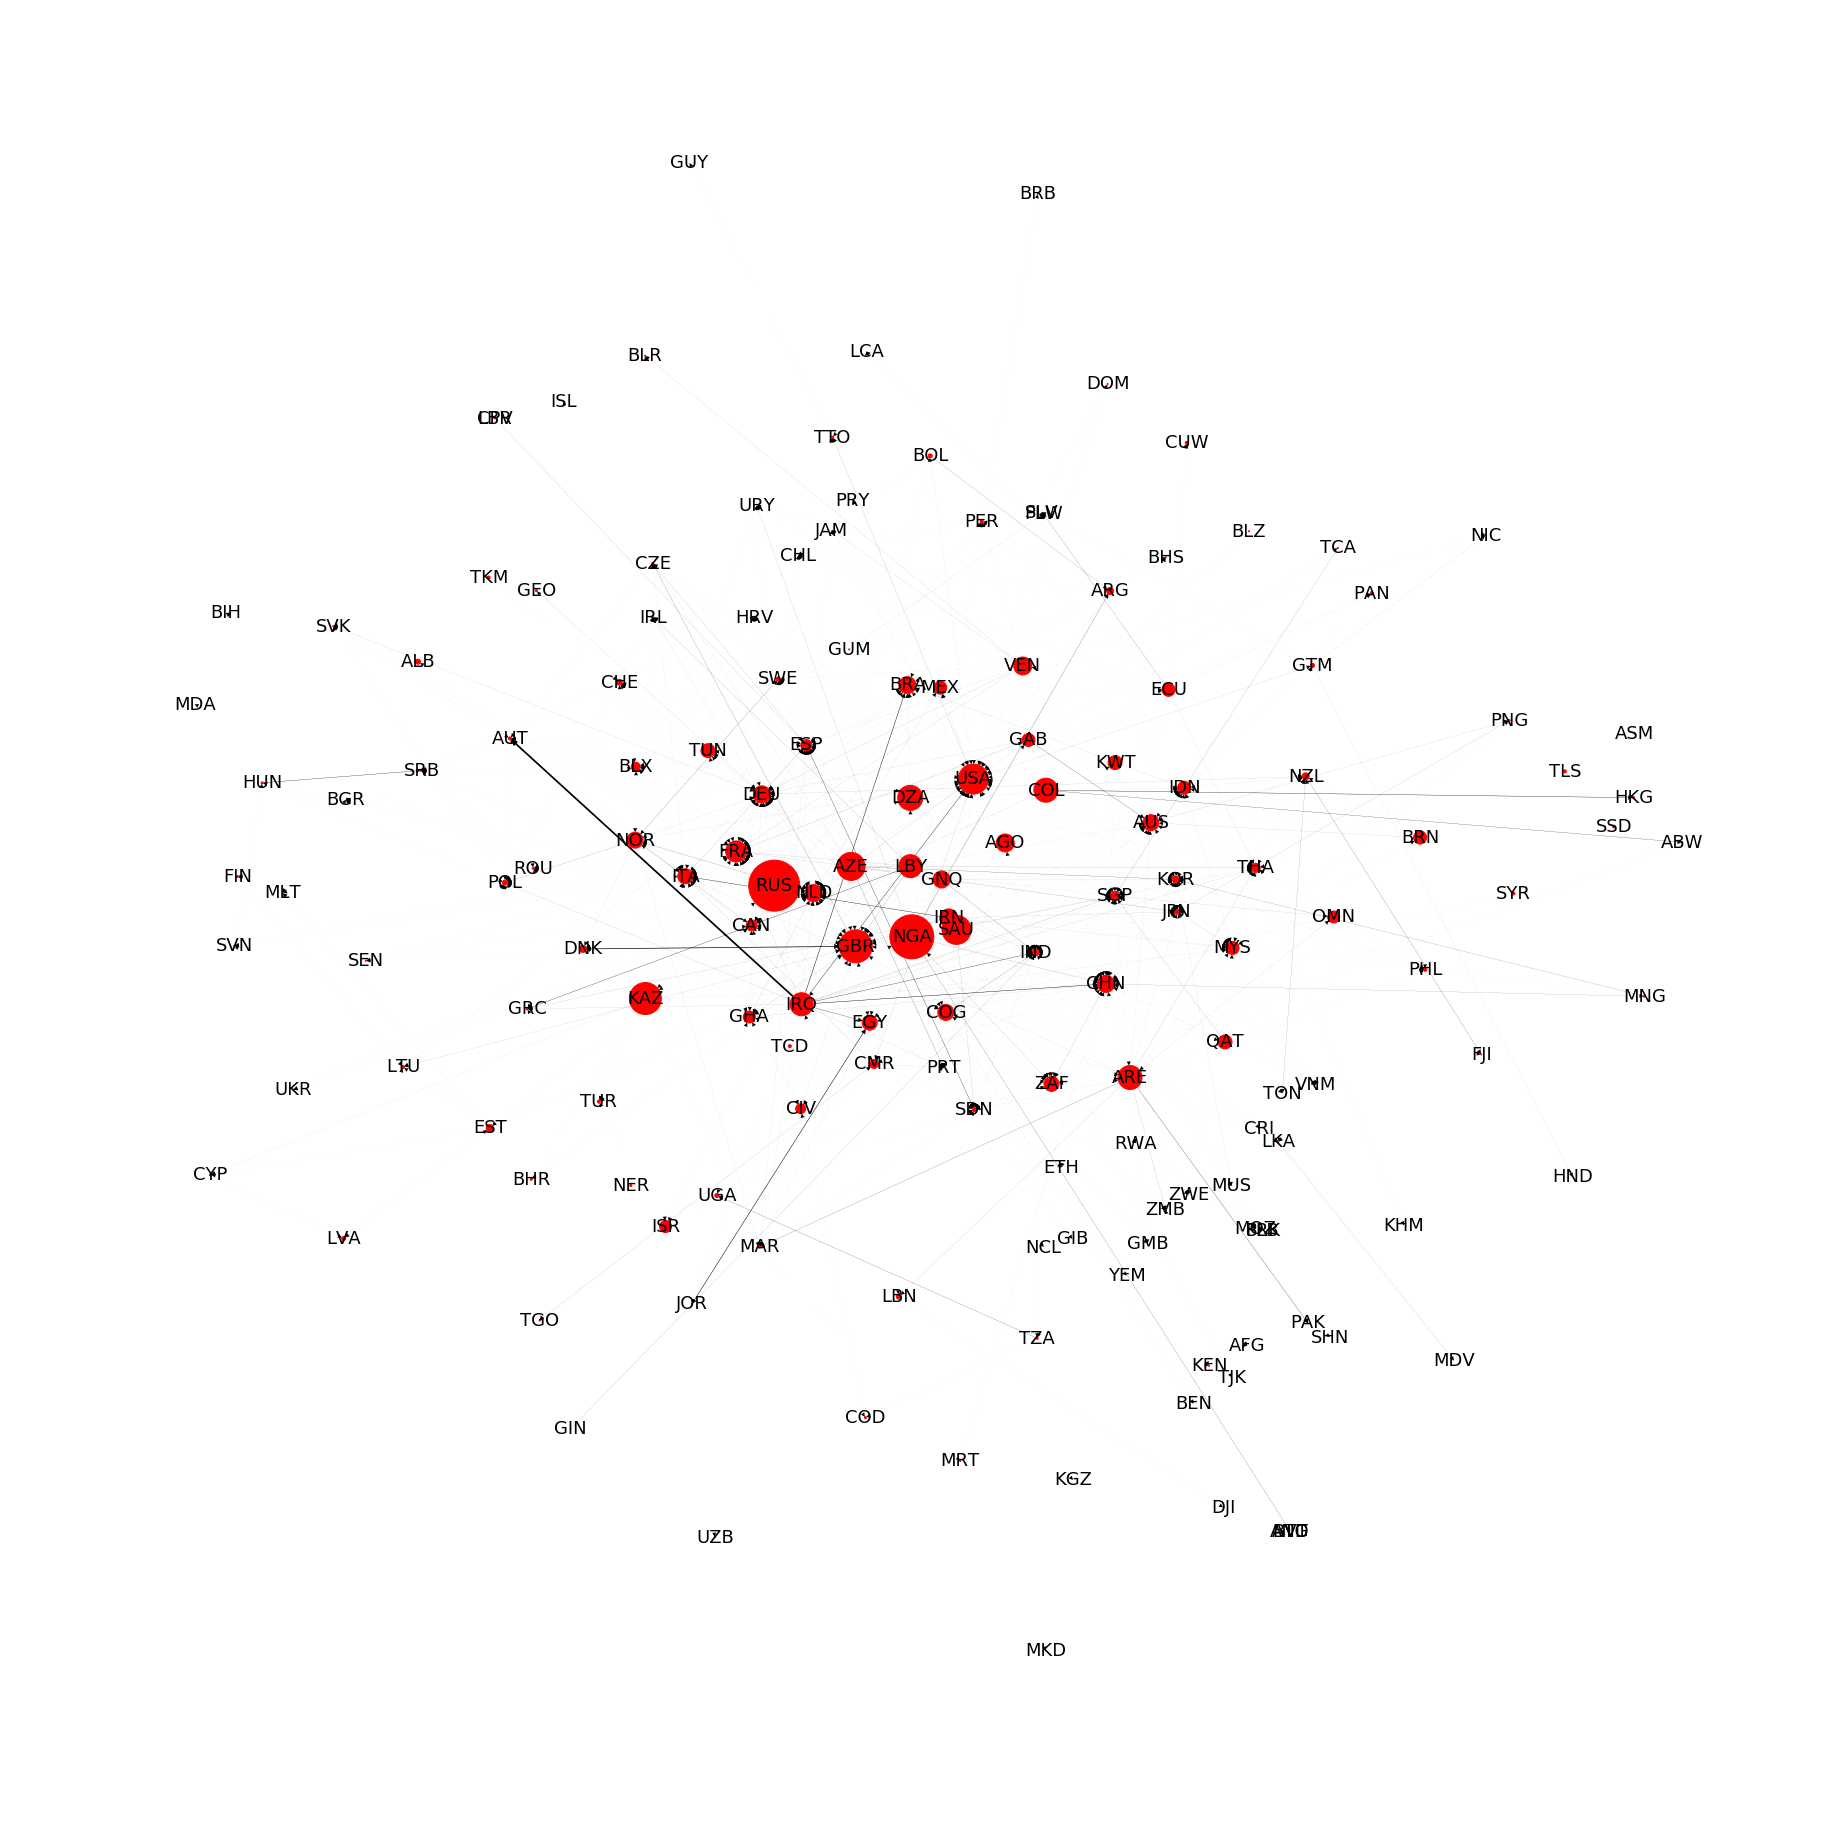

In [21]:
SIZE_OUT=[]
df_out=df_out[['grado_out']]
df_out.values
for i in df_out.values:
    SIZE_OUT.append(i*i)    
weight=WEIGHT.values 


plt.figure(3,figsize=(25,25)) #define el tamaño del dibujo del grafo

nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_OUT,with_labels=True) 

#TIPOS DE GRAFICOS EN NETWORKX
#nx.draw_random(G)  
#nx.draw_circular(G)  
#nx.draw_spectral(G)  
#nx.draw_spring(G)  

plt.savefig("C_c_out_2012.pdf")# Guardar la red en pdf. 
plt.show()


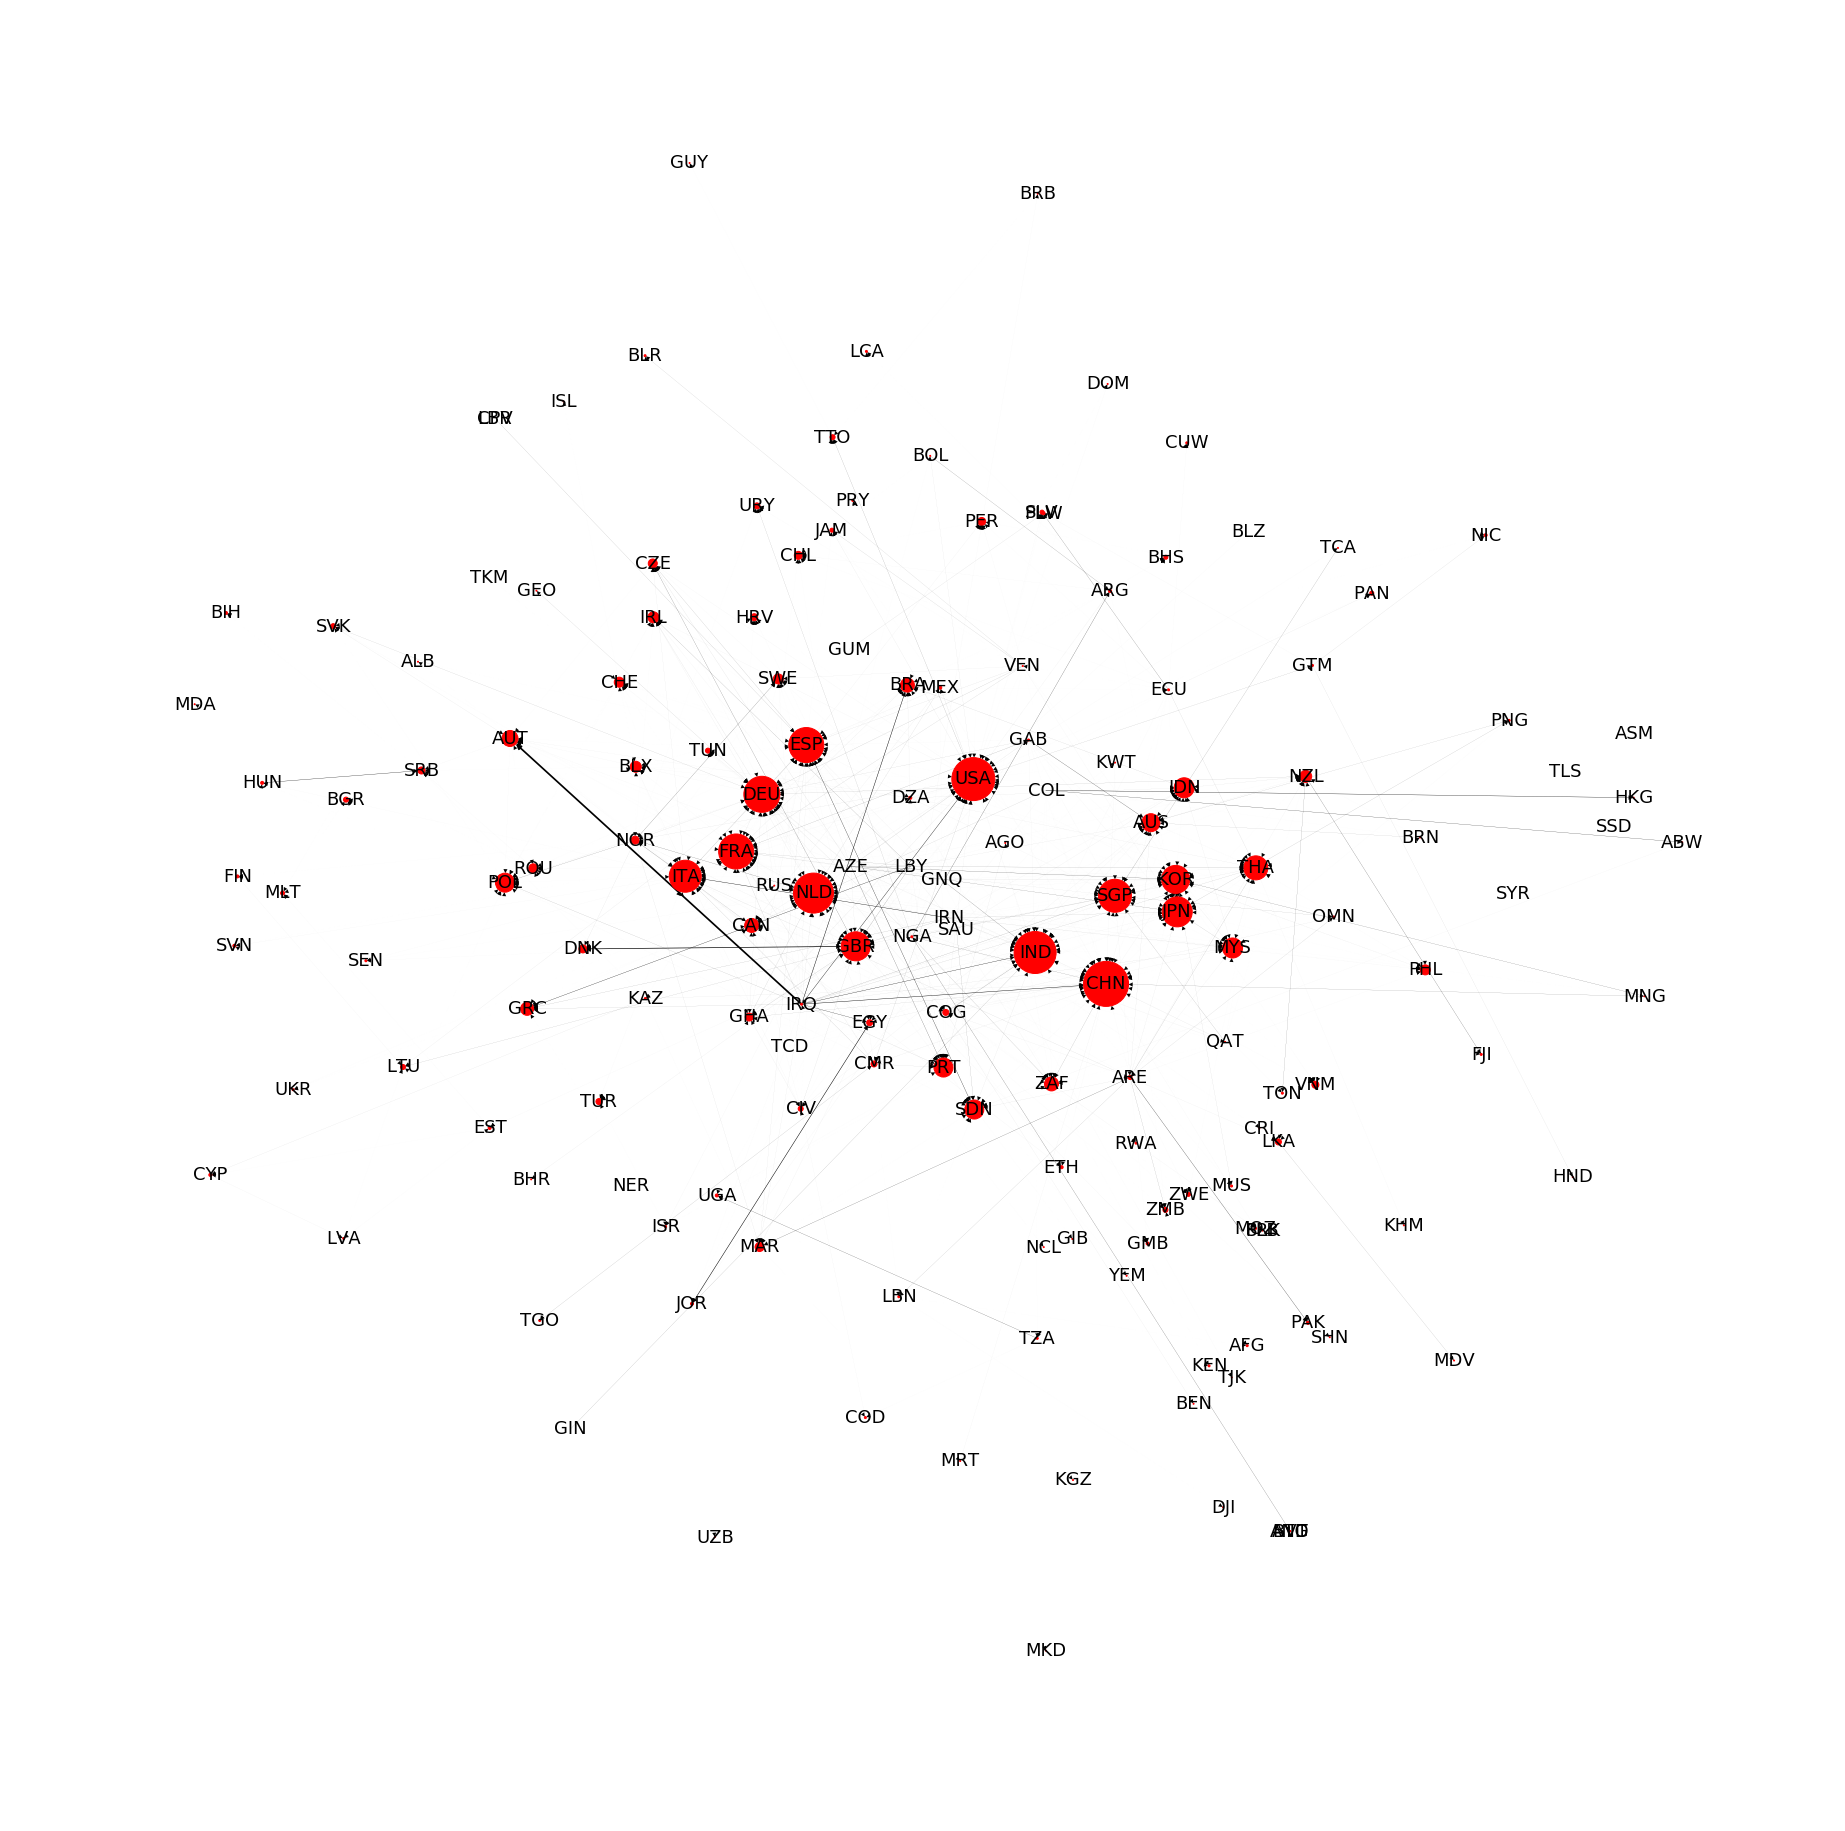

In [22]:
SIZE_IN=[]
df_in= df_in[['grado_in']]
df_in.values
for i in df_in.values:
    SIZE_IN.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_IN,with_labels=True)
plt.show()

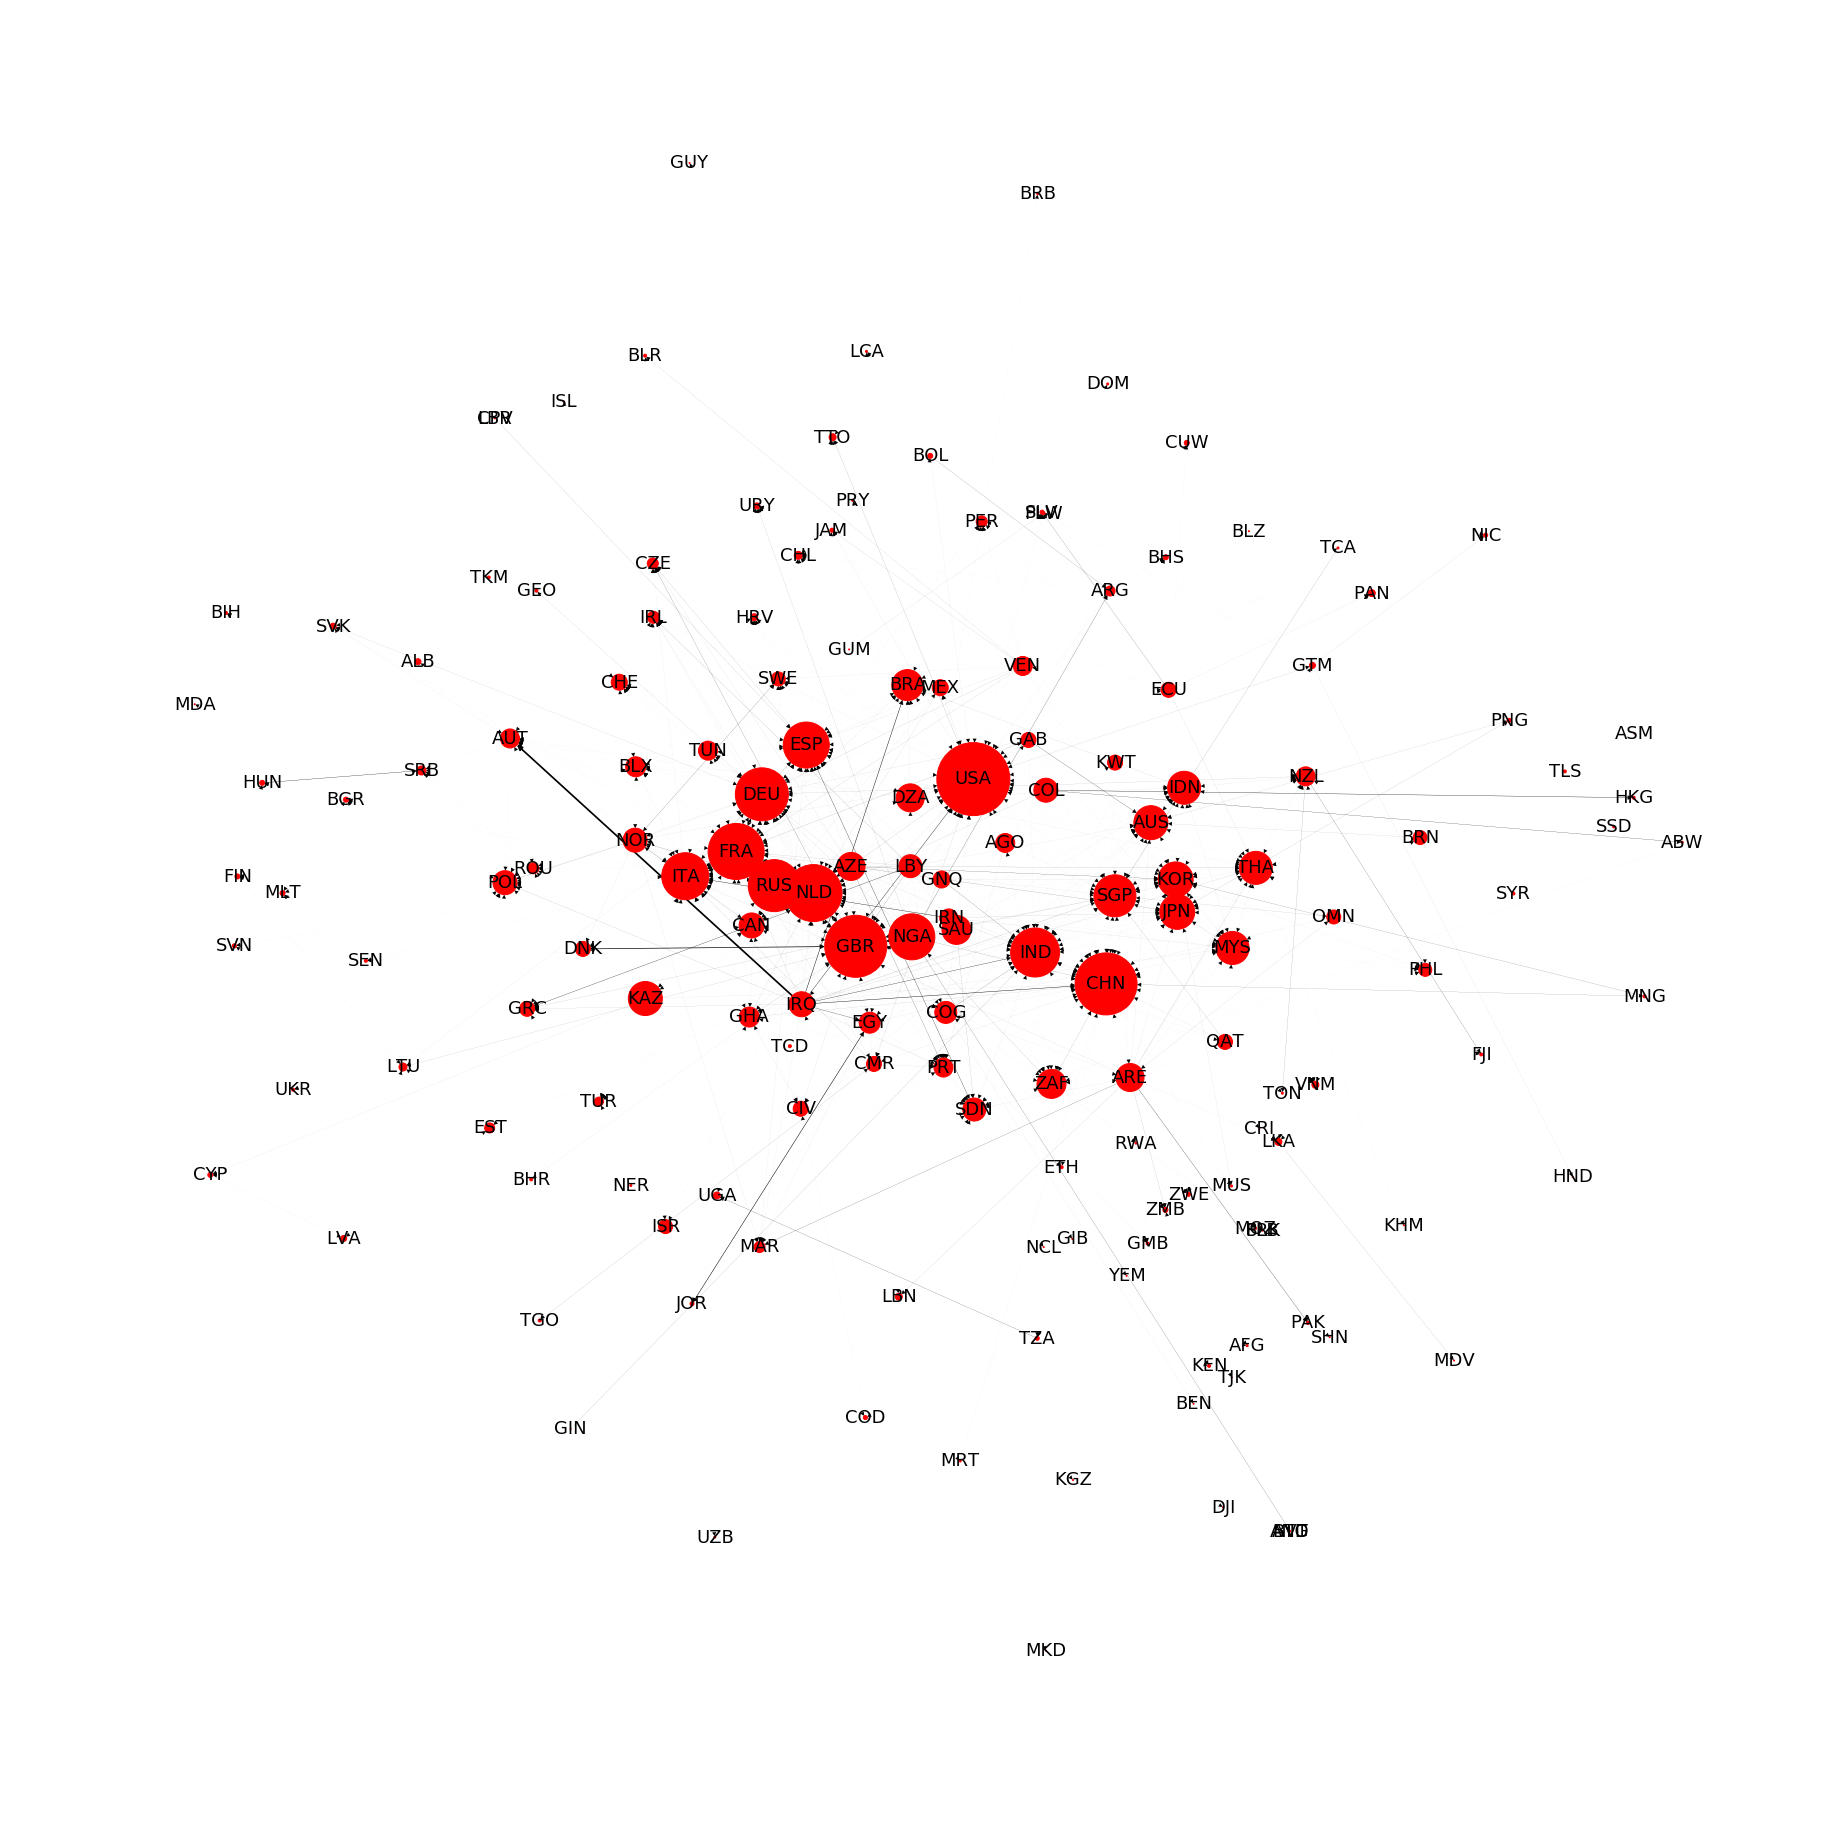

In [23]:
SIZE=[]
df= df[['grado']]
df.values
for i in df.values:
    SIZE.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE,with_labels=True)
plt.show()

#### Centralidad por intermediacion.

In [24]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
print(intr.sort_values(by='intermediacion', ascending=False))
intr.to_excel("intr_2012.xlsx") # Imprime el DataFrame a un xlsx

    Name  intermediacion
26   USA        0.124729
22   NLD        0.115412
20   GBR        0.076504
8    CHN        0.070672
119  KAZ        0.061430
4    ITA        0.047489
3    ESP        0.047442
30   ZAF        0.046877
19   FRA        0.046773
1    IND        0.045569
2    DEU        0.041117
46   POL        0.036284
11   SGP        0.034048
39   SDN        0.031630
27   BRA        0.028829
98   NGA        0.025753
95   ARE        0.025720
40   AUS        0.019091
63   GHA        0.017281
122  RUS        0.016341
12   THA        0.016263
92   ECU        0.015600
15   BLX        0.015594
10   KOR        0.015330
9    IDN        0.012540
14   AUT        0.012200
6    DZA        0.011106
60   TTO        0.009836
72   CMR        0.009730
41   MYS        0.009490
..   ...             ...
81   SLB        0.000000
79   PRK        0.000000
78   MOZ        0.000000
96   GNQ        0.000000
77   ETH        0.000000
76   TCD        0.000000
75   CPV        0.000000
69   PRY        0.000000


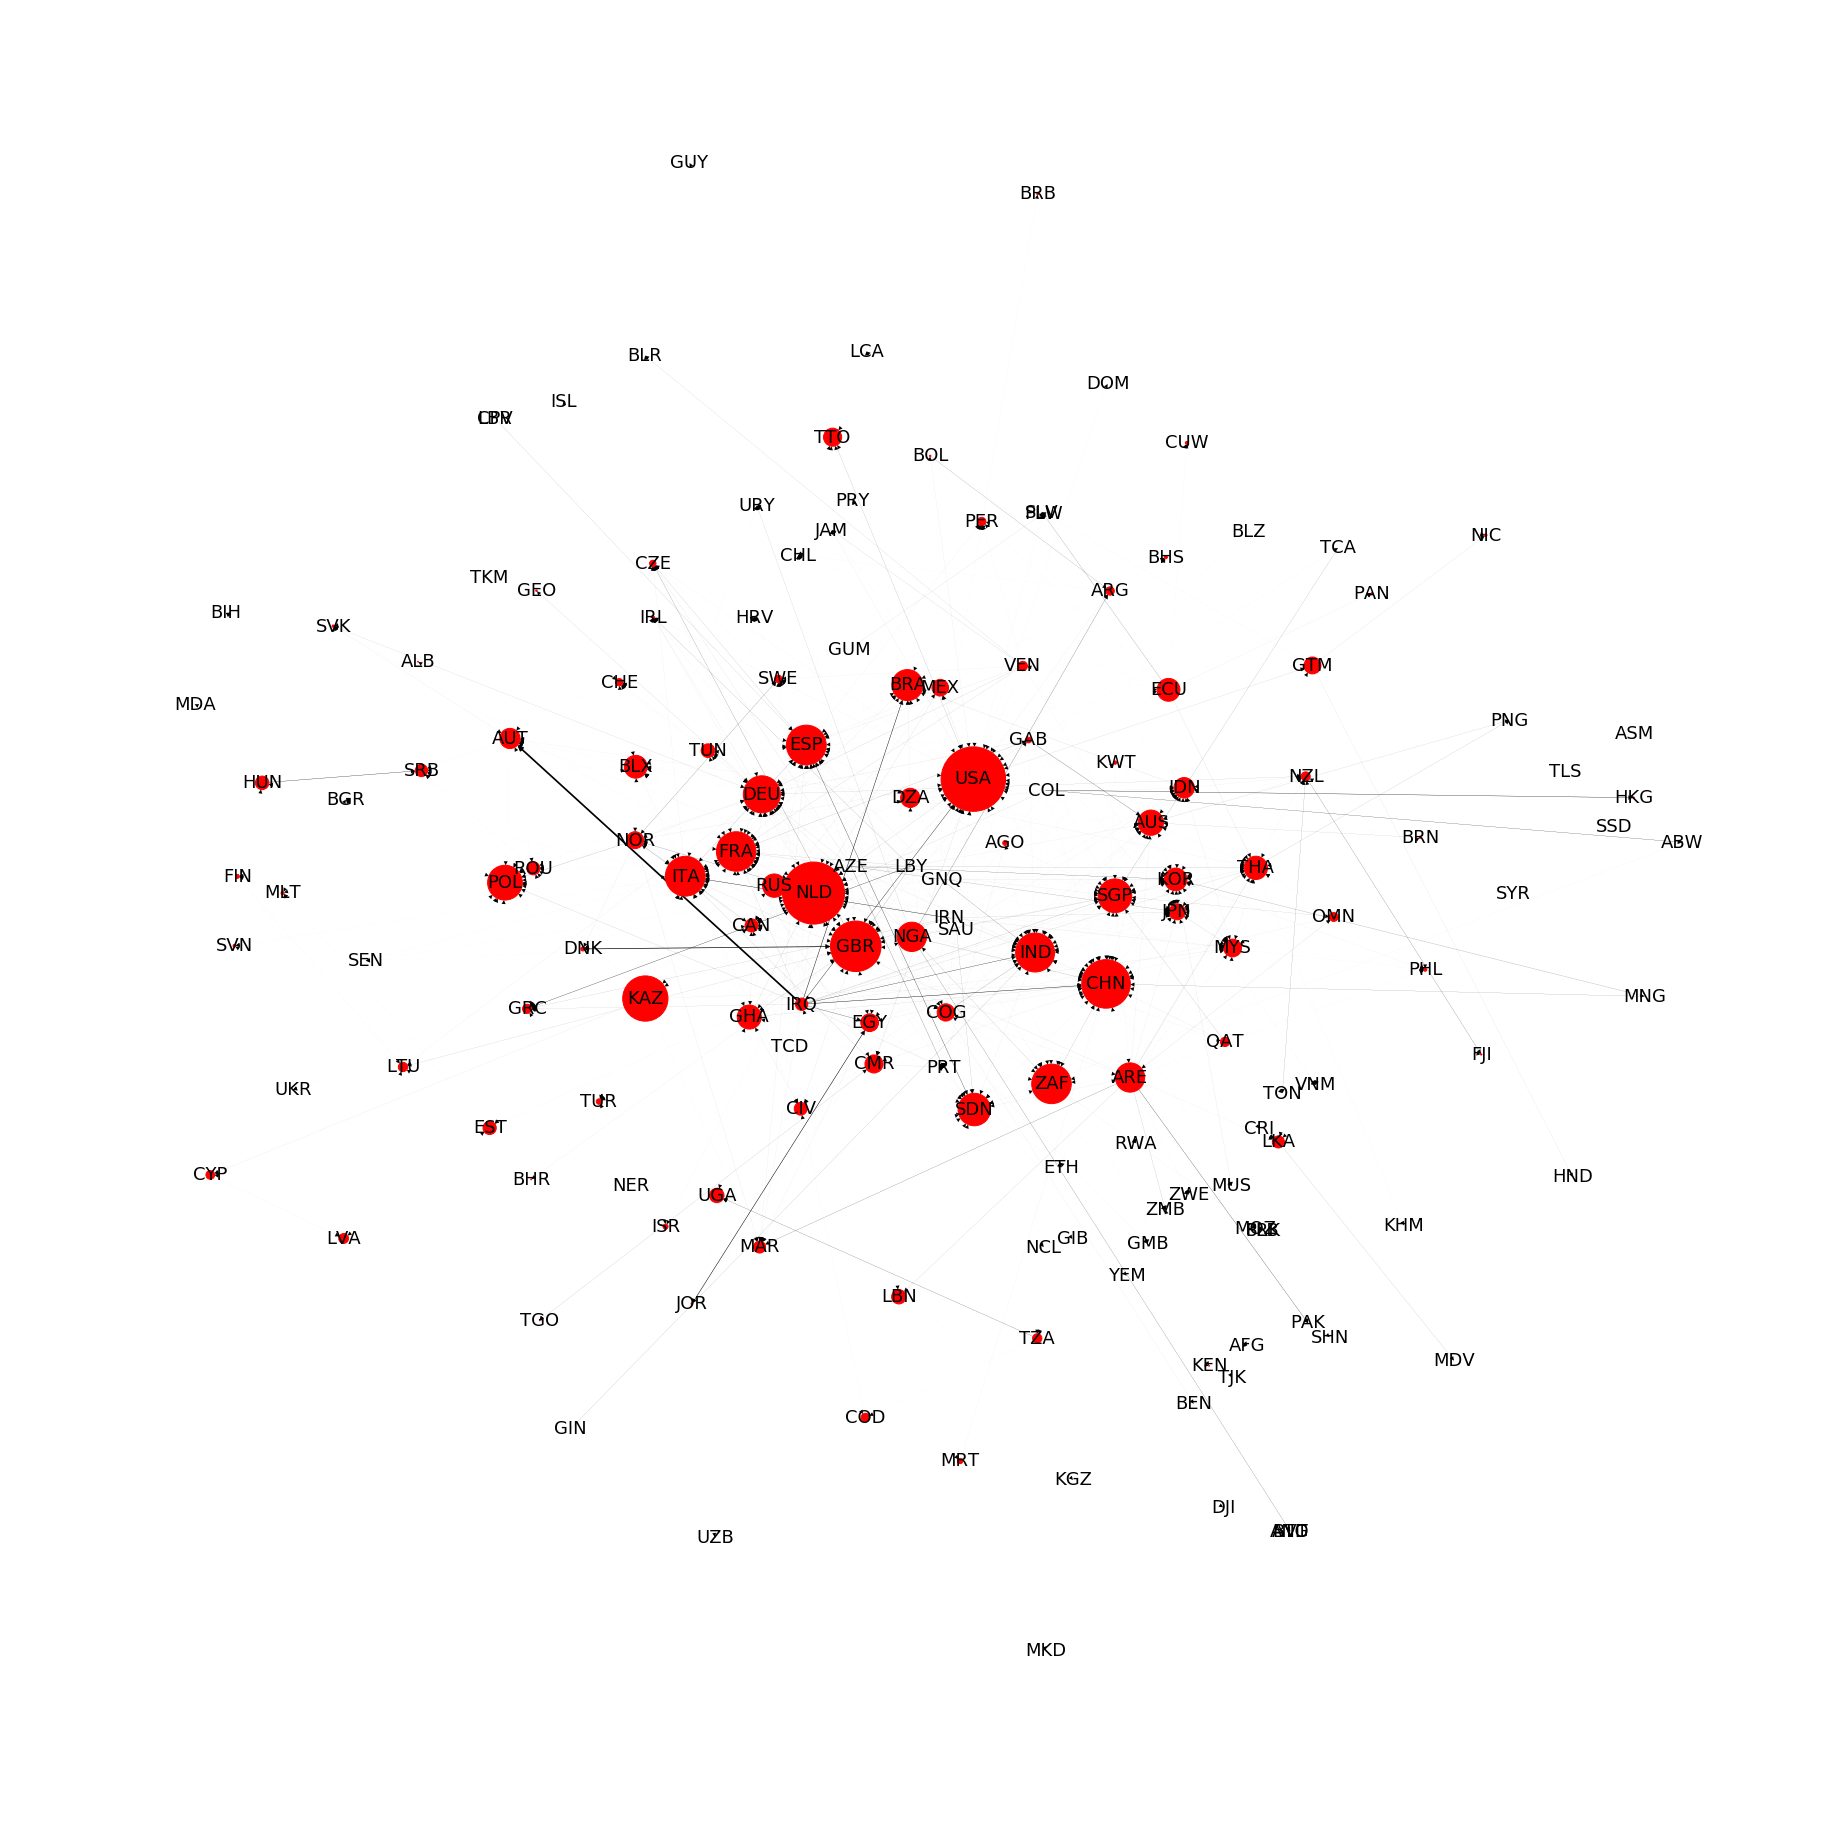

In [25]:
SIZE_INTR=[]
intr= intr[['intermediacion']]
intr.values
for i in intr.values:
    SIZE_INTR.append((i*100000/3))     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_INTR,with_labels=True)
plt.show()

#### Centralidad por cercania

In [26]:
cerc=nx.closeness_centrality(G)
cerc= pd.DataFrame([[key, cerc[key]] for key in cerc.keys()], columns=['Name', 'Cercania'])
print(cerc.sort_values(by='Cercania', ascending=False))
cerc.to_excel("cerc_2012.xlsx") # Imprime el DataFrame a un xlsx

    Name  Cercania
26   USA  0.379341
22   NLD  0.377482
1    IND  0.375640
8    CHN  0.363237
11   SGP  0.354868
19   FRA  0.353240
39   SDN  0.345320
4    ITA  0.345320
3    ESP  0.345320
31   JPN  0.330499
20   GBR  0.330499
2    DEU  0.329087
10   KOR  0.326298
9    IDN  0.315599
27   BRA  0.308025
21   IRL  0.306798
12   THA  0.300806
17   CZE  0.300806
40   AUS  0.300806
15   BLX  0.299635
46   POL  0.299635
41   MYS  0.293917
23   PRT  0.288235
56   HRV  0.288032
63   GHA  0.287337
72   CMR  0.284156
32   SWE  0.280023
43   NZL  0.280023
77   ETH  0.277032
47   ROU  0.273171
..   ...       ...
156  GUY  0.170806
139  BVT  0.158704
141  ATG  0.158704
140  AND  0.158704
59   BRB  0.157800
61   BLR  0.150697
88   LVA  0.148089
147  MKD  0.146542
0    ALB  0.145295
134  MNG  0.145295
38   ABW  0.006250
83   HKG  0.006250
138  NER  0.000000
109  GIN  0.000000
67   BLZ  0.000000
106  GUM  0.000000
157  TKM  0.000000
49   AZE  0.000000
155  TLS  0.000000
75   CPV  0.000000
153  SYR  0.

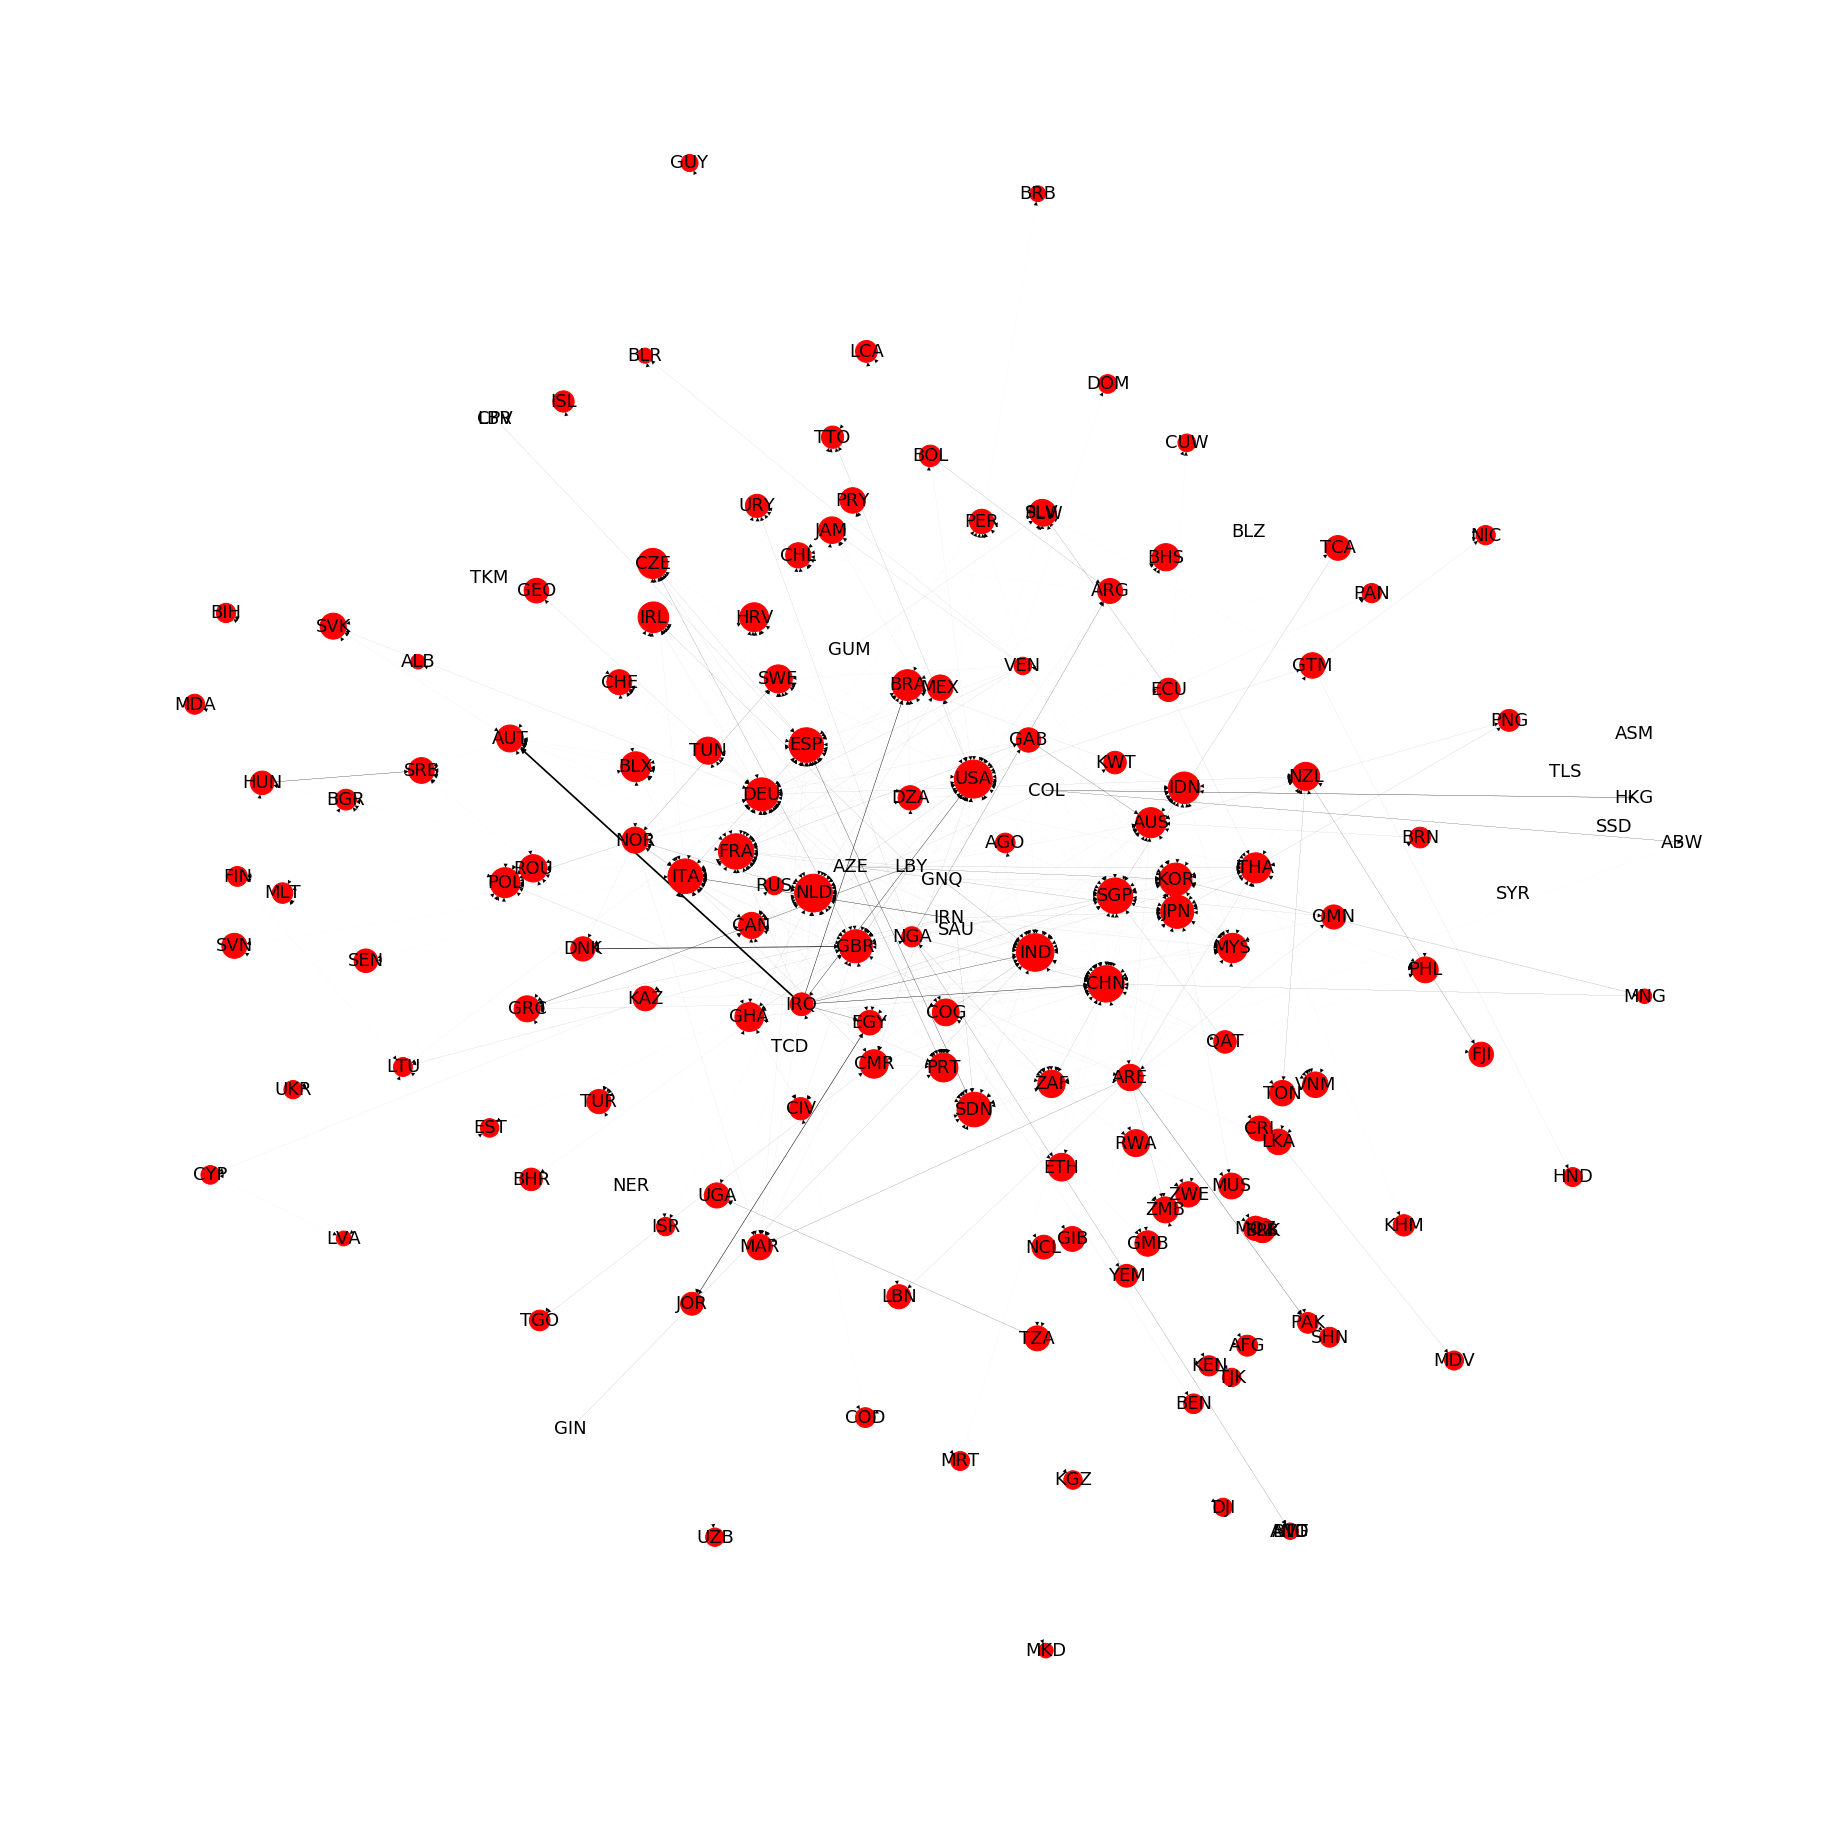

In [27]:
SIZE_CERC=[]
cerc= cerc[['Cercania']]

for i in cerc.values:
    SIZE_CERC.append((i*100)**2)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_CERC,with_labels=True)
plt.show()

###

In [28]:
r=nx.degree_assortativity_coefficient(G)
print(r)

-0.15647747804745699


### N-Cliques

Un clique es un sub-grafo en el cual todos  los nodos del sub-grafo estan conectados entre si,es decir que este es un grafo completo. El N-clique es el clique de N aristas por nodo. 

El clique es un sub-grafo no dirigido y se buscara dentro de grafos no dirigidos.

N-clique mas grande de nuestra red se puede encontrar como: 

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


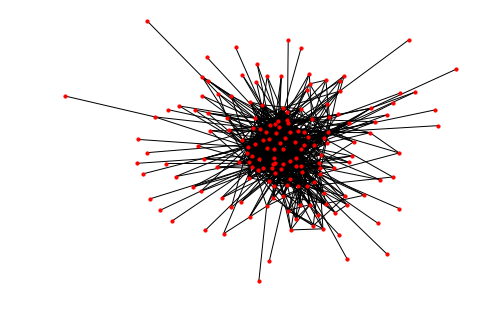

In [29]:
Gnd = nx.Graph() # grafo no dirigido 
 
    
Gnd.add_edges_from(EDGES.values)


nx.draw(Gnd,node_size=10,font_size=10,node_color='red') 



In [30]:
cliquesn = nx.nx.find_cliques(Gnd)
cliques4 = [clq for clq in cliquesn if len(clq) >= 8]
#print(cliques4)

In [31]:
nodes = set(n for clq in cliques4 for n in clq)
h = Gnd.subgraph(nodes)

['KAZ', 'BRA', 'AZE', 'DEU', 'GNQ', 'NOR', 'NGA', 'IDN', 'TUN', 'GBR', 'THA', 'ESP', 'KOR', 'NZL', 'LBY', 'GHA', 'AUS', 'NLD', 'COG', 'USA', 'FRA', 'ITA', 'CMR', 'POL', 'SGP', 'RUS', 'CHN', 'JPN', 'BRN', 'MYS', 'BLX', 'SAU', 'DZA']


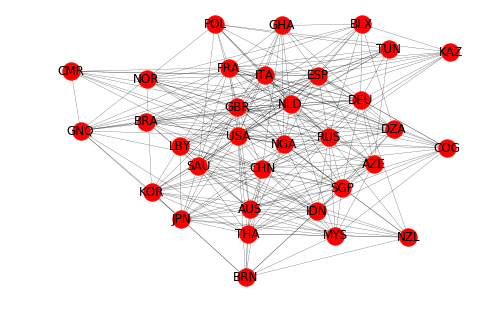

In [32]:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 8]
print(nodes)
k = h.subgraph(nodes)
nx.draw(k,with_labels=True,width=0.2)

In [33]:
g=nx.number_of_nodes(k)
print('g=',g)
L=nx.number_of_edges(k)
print('L=',L)

g= 33
L= 273


In [34]:
grado_promedio=L/g
print(grado_promedio)

8.272727272727273


In [35]:
L_p=g*(g-1)/2
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 528.0
Densidad = 0.5170454545454546


['KAZ', 'BRA', 'AZE', 'DEU', 'GNQ', 'NOR', 'NGA', 'IDN', 'TUN', 'GBR', 'THA', 'ESP', 'KOR', 'NZL', 'LBY', 'GHA', 'AUS', 'NLD', 'COG', 'USA', 'FRA', 'ITA', 'CMR', 'POL', 'SGP', 'RUS', 'CHN', 'JPN', 'BRN', 'MYS', 'BLX', 'SAU', 'DZA']


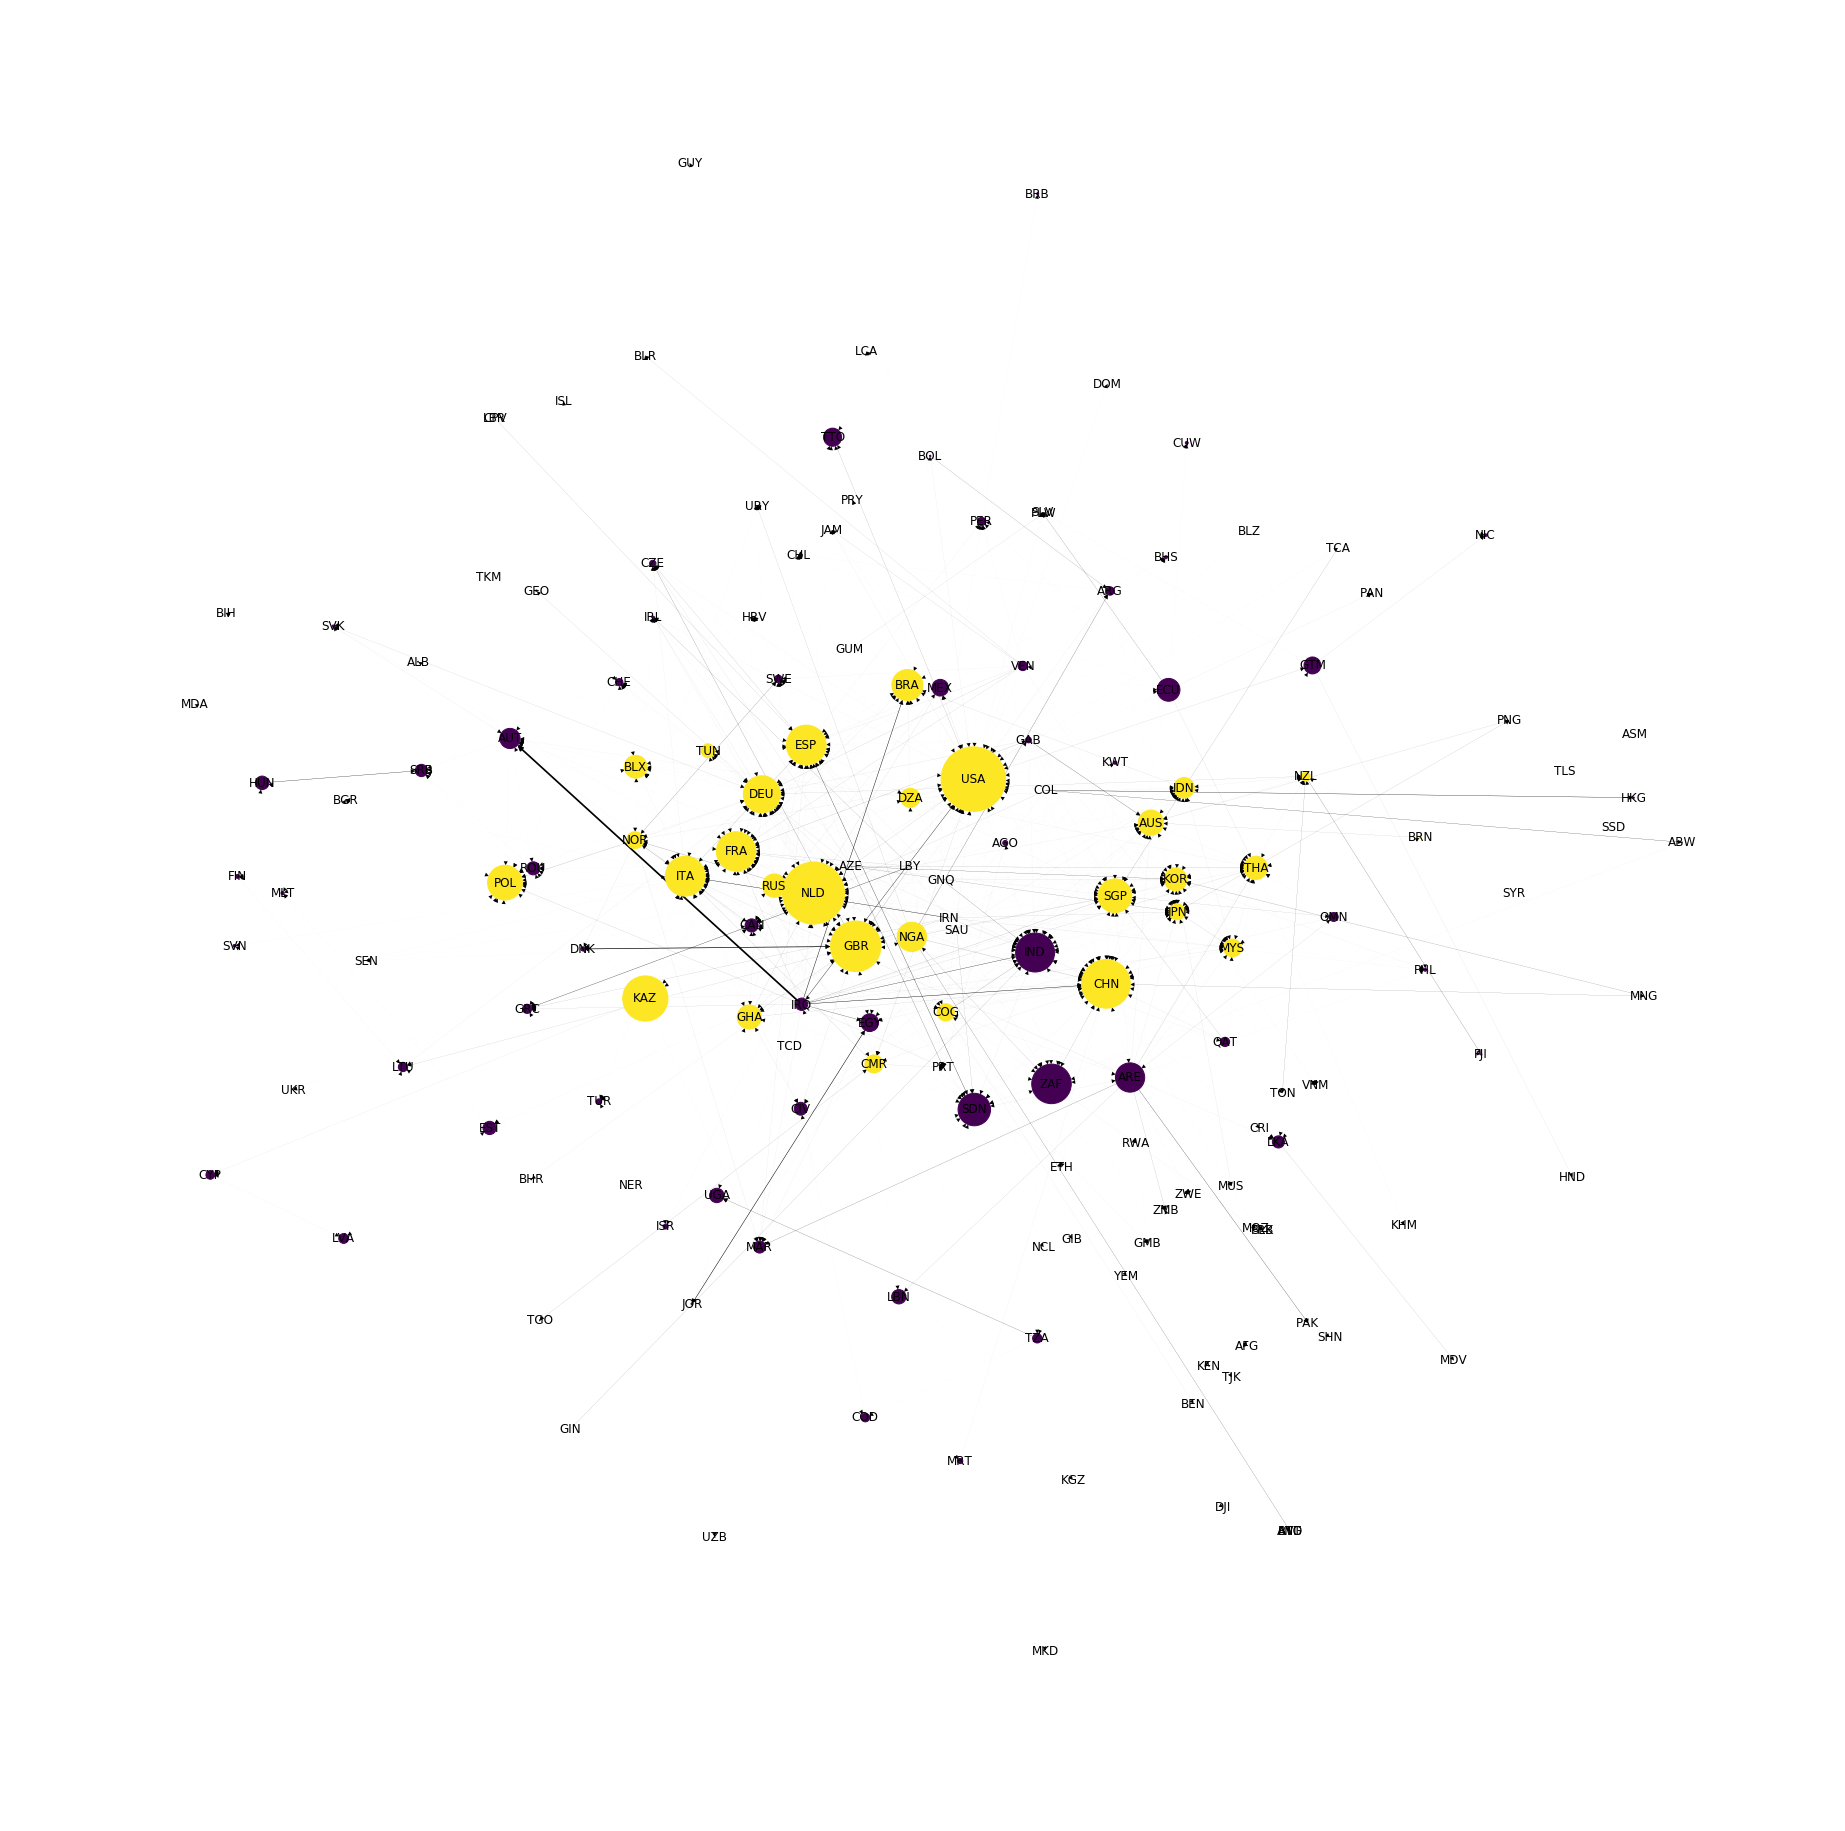

In [36]:
nodes=h.nodes
print(nodes)

val_map = {}
for i in nodes: 
    val_map[i]= 1.0
    
values = [val_map.get(node, 0.25) for node in G.nodes()]
    
  

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=12, node_color=values ,node_size=SIZE_INTR ,with_labels=True)
plt.show()


### Diametro del grafo 

In [37]:
nx.diameter(Gnd)

5